# Analisis Exploratorio de Datos - Edx

Importamos las librerias necesarias

In [4]:
#Importamos las librerias necesarias.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import wordcloud
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
import ydata_profiling
from ydata_profiling import ProfileReport
import langdetect
from langdetect import detect
import googletrans
from googletrans import Translator

%matplotlib inline
%config IPCompleter.greedy=True

Importamos el Dataset

In [5]:
edx_courses = pd.read_csv(r"C:\Users\miche\OneDrive\Escritorio\Henry\Proyecto_DatAnalitycs\DataSets_originales\edx_courses.csv", thousands=",", na_values=np.nan) #dataset importado ok

Verificacion de que la importacion fue correcta

In [6]:
edx_courses.head(2) #Verificamos si el dataset fue importado de forma correcta.

title  \
0                                How to Learn Online   
1  Programming for Everybody (Getting Started wit...   

                                             summary  n_enrolled  \
0  Learn essential strategies for successful onli...    124980.0   
1  This course is a "no prerequisite" introductio...    293864.0   

               course_type                 institution  \
0  Self-paced on your time                         edX   
1  Self-paced on your time  The University of Michigan   

                               instructors         Level  \
0  Nina Huntemann-Robyn Belair-Ben Piscopo  Introductory   
1                        Charles Severance  Introductory   

                        subject language subtitles       course_effort  \
0  Education & Teacher Training  English   English  2–3 hours per week   
1              Computer Science  English   English  2–4 hours per week   

  course_length                                        price  \
0       2 Weeks  FREE-Add a Verified Certificate for $49 USD   
1       7 Weeks  FREE-Add a Verified Certificate for $49 USD   

                                  course_description  \
0  Designed for those who are new to elearning, t...   
1  This course aims to teach everyone the basics ...   

                                     course_syllabus  \
0  Welcome - We start with opportunities to meet ...   
1                                                NaN   

                                          course_url  
0     https://www.edx.org/course/how-to-learn-online  
1  https://www.edx.org/course/programming-for-eve...

Verificamos la informacion y tipo de dato en el Dataset

In [7]:
edx_courses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 975 entries, 0 to 974
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   title               975 non-null    object 
 1   summary             922 non-null    object 
 2   n_enrolled          855 non-null    float64
 3   course_type         975 non-null    object 
 4   institution         975 non-null    object 
 5   instructors         972 non-null    object 
 6   Level               975 non-null    object 
 7   subject             975 non-null    object 
 8   language            975 non-null    object 
 9   subtitles           972 non-null    object 
 10  course_effort       975 non-null    object 
 11  course_length       975 non-null    object 
 12  price               975 non-null    object 
 13  course_description  935 non-null    object 
 14  course_syllabus     417 non-null    object 
 15  course_url          975 non-null    object 
dtypes: float

Agregamos nuevas columnas:
* certificate : bool
* certificate_price : float

Transformamos la columna: price

In [8]:
#Creamos las nuevas columnas
edx_courses.insert(13, "certificate", value= "YES") #insertamos nueva columna
edx_courses.insert(14, "certificate_price", value= "") #insertamos nueva columna

#Poblamos la columna certificate_price
for indice, elemento in enumerate(edx_courses.price): #iteramos el indice y elemento de la columna price
    inicio = edx_courses.price[indice].index("$")+1 # creamos una variable y le asignamos el valor del indice donde se encuentra el "$" +1
    final = edx_courses.price[indice].index("USD")-1 # creamos una variable y le asignamos el valor del indice donde se encuentra el "USD" +1
    price_c = edx_courses.price[indice][inicio:final] # creamos una variable para que a medida que itera haga slicing
    price_c = round(float(price_c),3) #cambiamos el formato y redondeamos a 3 digitos
    edx_courses.certificate_price[indice] = price_c #poblamos nuestra columna de certificate_price.

#Cambiamos la informacion en la columna price
for indice, elemento in enumerate(edx_courses.price): #iteramos sobre la columna price
    edx_courses.price[indice] = "FREE" #cambiamos la informacion para que cada registro diga "Free"

C:\Users\miche\AppData\Local\Temp\ipykernel_14464\1243190208.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  edx_courses.certificate_price[indice] = price_c #poblamos nuestra columna de certificate_price.
C:\Users\miche\AppData\Local\Temp\ipykernel_14464\1243190208.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  edx_courses.price[indice] = "FREE" #cambiamos la informacion para que cada registro diga "Free"


Verificamos la informacion y tipo de dato en el Dataset

In [9]:
edx_courses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 975 entries, 0 to 974
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   title               975 non-null    object 
 1   summary             922 non-null    object 
 2   n_enrolled          855 non-null    float64
 3   course_type         975 non-null    object 
 4   institution         975 non-null    object 
 5   instructors         972 non-null    object 
 6   Level               975 non-null    object 
 7   subject             975 non-null    object 
 8   language            975 non-null    object 
 9   subtitles           972 non-null    object 
 10  course_effort       975 non-null    object 
 11  course_length       975 non-null    object 
 12  price               975 non-null    object 
 13  certificate         975 non-null    object 
 14  certificate_price   975 non-null    object 
 15  course_description  935 non-null    object 
 16  course_s

Conversion de Variables

In [10]:
#Convertimos las variables necesarias para poder trabajarlas.
edx_courses.summary = edx_courses.summary.astype(str)
edx_courses.course_description = edx_courses.course_description.astype(str)
edx_courses.course_syllabus = edx_courses.course_syllabus.astype(str)
edx_courses.Level = edx_courses.Level.astype("category")
edx_courses.certificate_price = edx_courses.certificate_price.astype(float)

#Rename
edx_courses.rename(columns={"Level": "level"}, inplace=True)


#Transformar idiomas con detect.
def detect_language(idioma): # Definimos la función. 
    try: # Usamos try-except para que maneje los errores y pueda ejecutarse sin problemas. 
        return detect(idioma) # Aplicamos la función "detect" al parametro enviado.  
    except:
        return None #retornamos nulo si nos encontramos con problemas. 
    
#Aplicacion de la funcion a las columnas language y subtitles
edx_courses.loc[:, 'language'] = edx_courses['language'].apply(detect_language) # Aplicamos todos los valores detectados en la función a la columna language
edx_courses.loc[:, 'subtitles'] = edx_courses['subtitles'].apply(detect_language) # Aplicamos todos los valores detectados en la función a la columna subtitles

Reemplazamos los valores transformados por la funcion detect_language

In [11]:
#Cambiamos
edx_courses.language = edx_courses.language.replace({"en":"English", "es":"Spanish", "fr":"French", "zh-tw": "Chinese", "zh-cn": "Chinese", "pt":"Portuguese", "it":"Italian", "de":"Deutsch", "ar":"Arabic", "tl":"English"})
edx_courses.subtitles = edx_courses.subtitles.replace({"en":"English", "es":"Spanish", "fr":"French", "zh-tw": "Chinese", "zh-cn": "Chinese", "pt":"Portuguese", "it":"Italian", "de":"Deutsch", "ar":"Arabic", "tl":"English", "ru":"Russian", "et":"Etiopian"})

Conteo de nulos - Numeros

In [12]:
edx_courses.isnull().sum().sort_values(ascending=False)

n_enrolled            120
subtitles               3
instructors             3
course_effort           0
course_syllabus         0
course_description      0
certificate_price       0
certificate             0
price                   0
course_length           0
title                   0
summary                 0
language                0
subject                 0
level                   0
institution             0
course_type             0
course_url              0
dtype: int64

Conteo de nulos - Porcentaje

In [13]:
edx_courses.isnull().sum().sort_values(ascending=False)/len(edx_courses)*100

n_enrolled            12.307692
subtitles              0.307692
instructors            0.307692
course_effort          0.000000
course_syllabus        0.000000
course_description     0.000000
certificate_price      0.000000
certificate            0.000000
price                  0.000000
course_length          0.000000
title                  0.000000
summary                0.000000
language               0.000000
subject                0.000000
level                  0.000000
institution            0.000000
course_type            0.000000
course_url             0.000000
dtype: float64

In [14]:
#Llenamos los vacios de n_enrolled
edx_courses["n_enrolled"].fillna(0, inplace=True)

Conteo de Duplicados

In [15]:
print(f'Valores Duplicados del dataset edx_courses: {edx_courses.duplicated().sum()}')

Valores Duplicados del dataset edx_courses: 1


Mostramos por pantalla los duplicados

In [16]:
edx_courses[edx_courses.duplicated()]

title  \
95  Introduction to Probability   

                                              summary  n_enrolled  \
95  Learn probability, an essential language and s...     97291.0   

                course_type         institution        instructors  \
95  Self-paced on your time  Harvard University  Joseph Blitzstein   

           level                     subject language subtitles  \
95  Intermediate  Data Analysis & Statistics  English   English   

          course_effort course_length price certificate  certificate_price  \
95  5–10 hours per week      10 Weeks  FREE         YES               99.0   

                                   course_description course_syllabus  \
95  Probability and statistics help to bring logic...             nan   

                                           course_url  
95  https://www.edx.org/course/introduction-to-pro...

Borramos el registro duplicado y mantenemos el primero

In [17]:
edx_courses.drop_duplicates(keep="first", inplace=True)

Verificamos si los duplicados fueron removidos con exito

In [18]:
print(f'Valores Duplicados del dataset edx_courses: {edx_courses.duplicated().sum()}')

Valores Duplicados del dataset edx_courses: 0


Reseteamos el index del dataset

In [19]:
edx_courses = edx_courses.reset_index(drop=True)

Creacion de Funciones

In [20]:
def word_cloud(variable:str, numero_palabras=200):

    listaPalabras = []
    for elemento in edx_courses[variable]:
        listaPalabras.append(elemento)

    #Hacemos la union de cada palabra, para convertirla a un str
    listaPalabras = " ".join(listaPalabras)
    listaPalabras = listaPalabras.replace("'", "")

    #creamos la variable que contiene stopwords de ingles y español
    stop_words = set(stopwords.words(["spanish", "english"]))

    #Generamos el wordcloud
    wordcloud = WordCloud(stopwords=stop_words, background_color="white", relative_scaling=0, max_words=numero_palabras).generate(listaPalabras)

    #Creamos la figura:
    plt.figure(figsize=(20,10))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

Borramos la colummna que no nos aporta valor a nuestro EDA

In [21]:
edx_courses.drop(labels=["course_url"], axis=1, inplace=True)

# Analisis Univariante

Title - Wordcloud

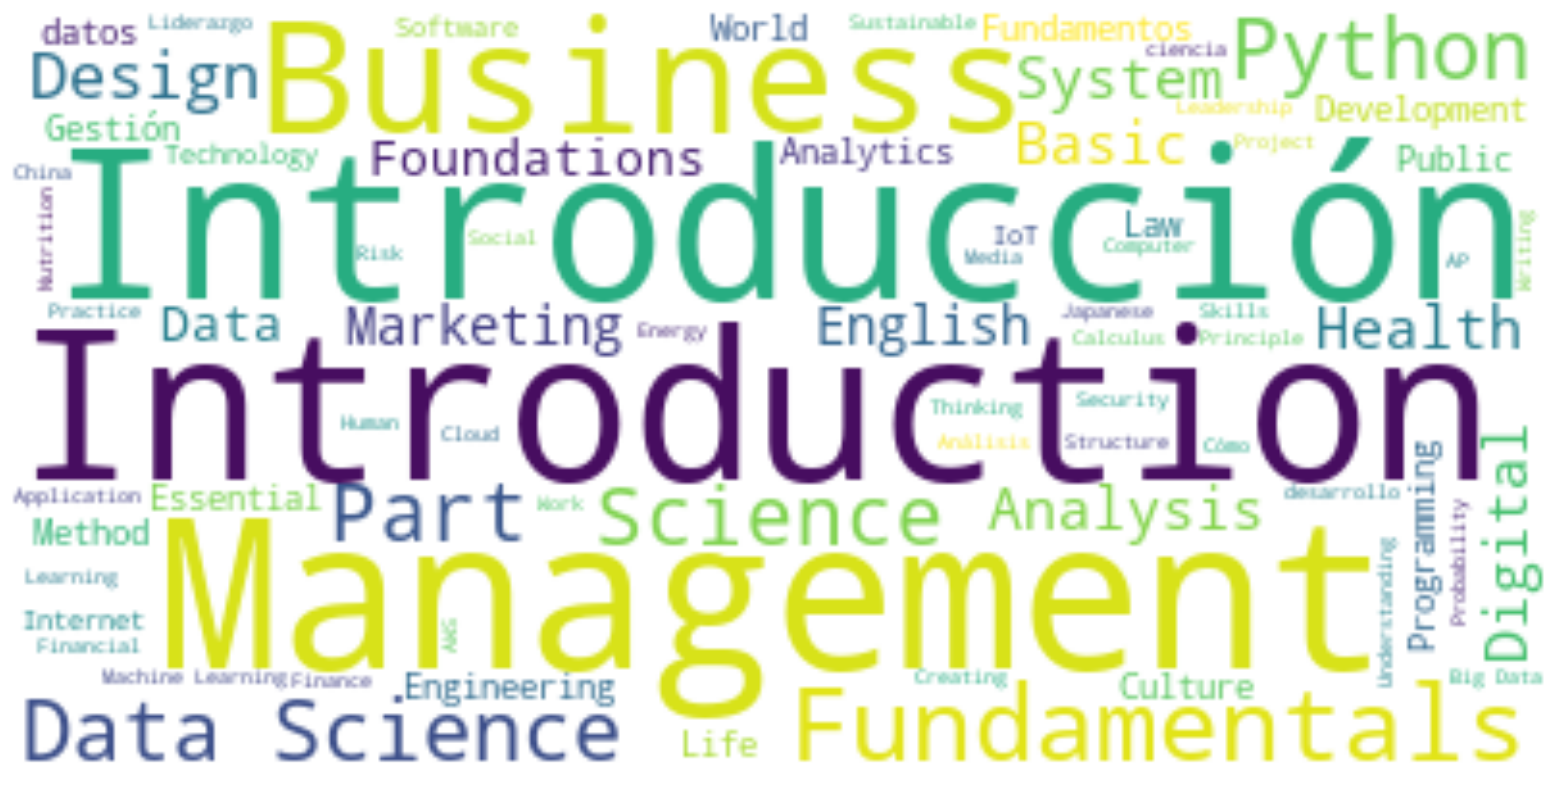

In [22]:
word_cloud("title")

Insight:
* Podemos observar que las palabras que mas se repiten en los titulos son las mas grandes por ende serian: Introduccion o Introduction, Management, Business, Fundamentals, Data.

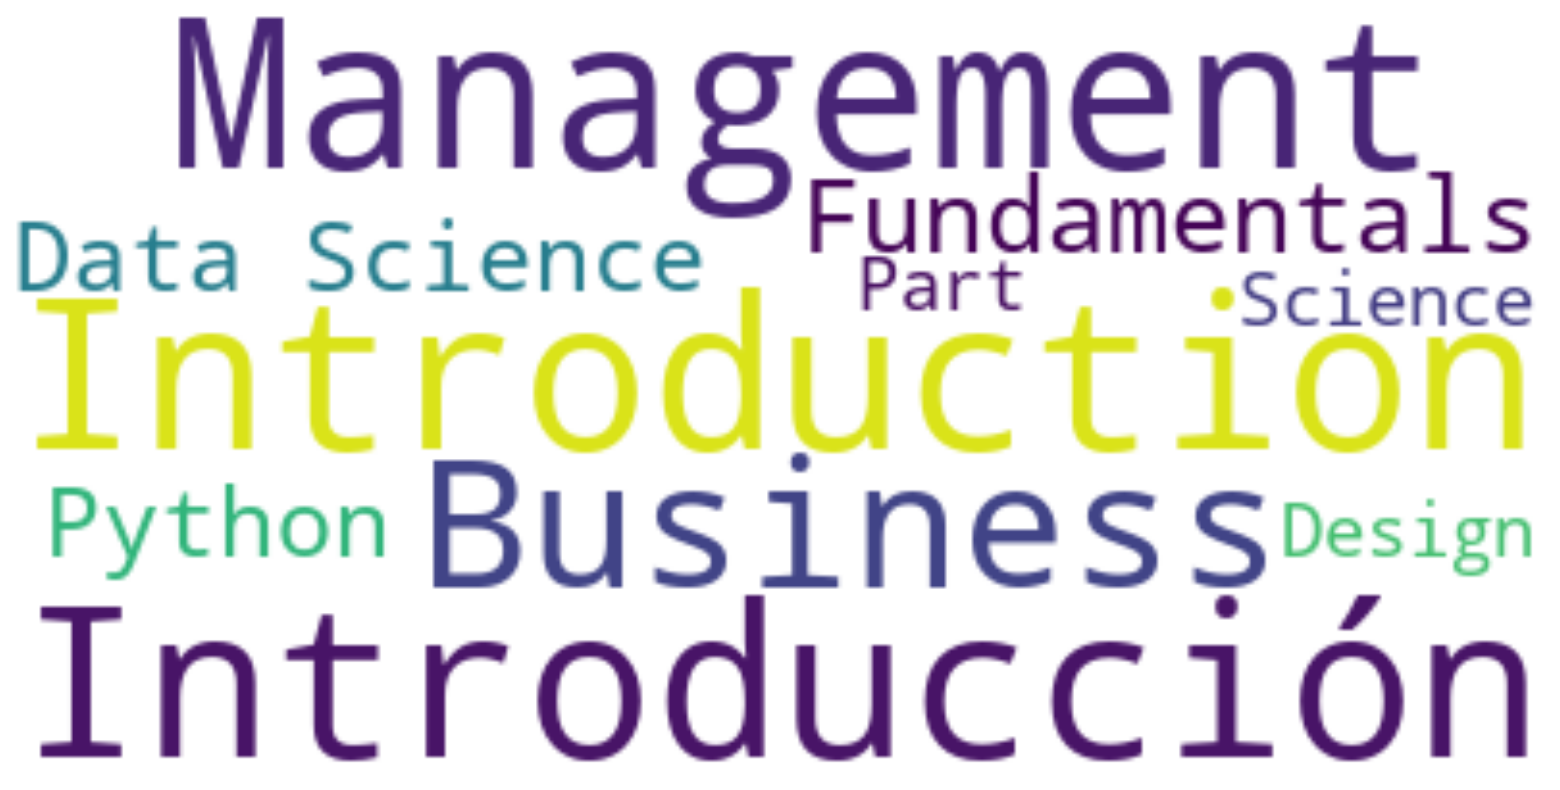

In [23]:
word_cloud("title", 10)

Insight:
* Para saber con exactitud cuales son las palabras que mas se repiten podemos cambiar el valor de argumento "max_word = X" , donde X es el numero maximo de palabras que se mostrara en el wordcloud
* Haciendo un cambio al argumento "max_word = 10" podemos observar que existe una alta tendencia a que los cursos que se imparten son introduccion a Data Science o Python asi como  management business.
* Esto nos ayuda a visualizar que si queremos aperturar un nuevo curso, una buena estrategia para el existo seria incorporar una de las palabras que estan dentro del wordcloud al titulo del curso que aperturaremos.

Summary - Wordcloud

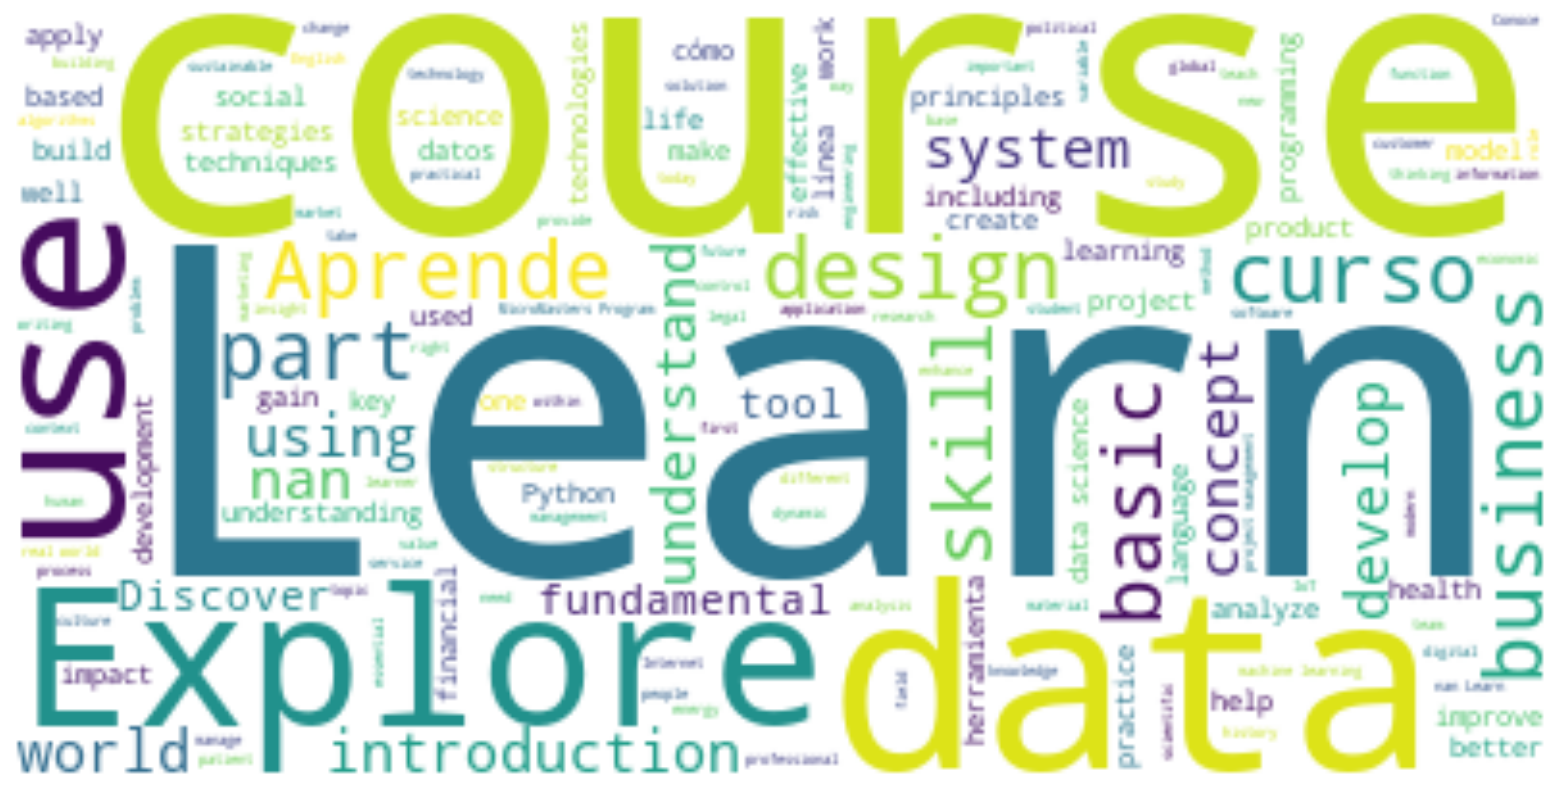

In [24]:
word_cloud("summary")

Insight:
* Podemos observar que las palabras que mas se repiten en los resumenes son las mas grandes por ende serian: Aprende o Learn, Course o Curso, Explore, data, use.

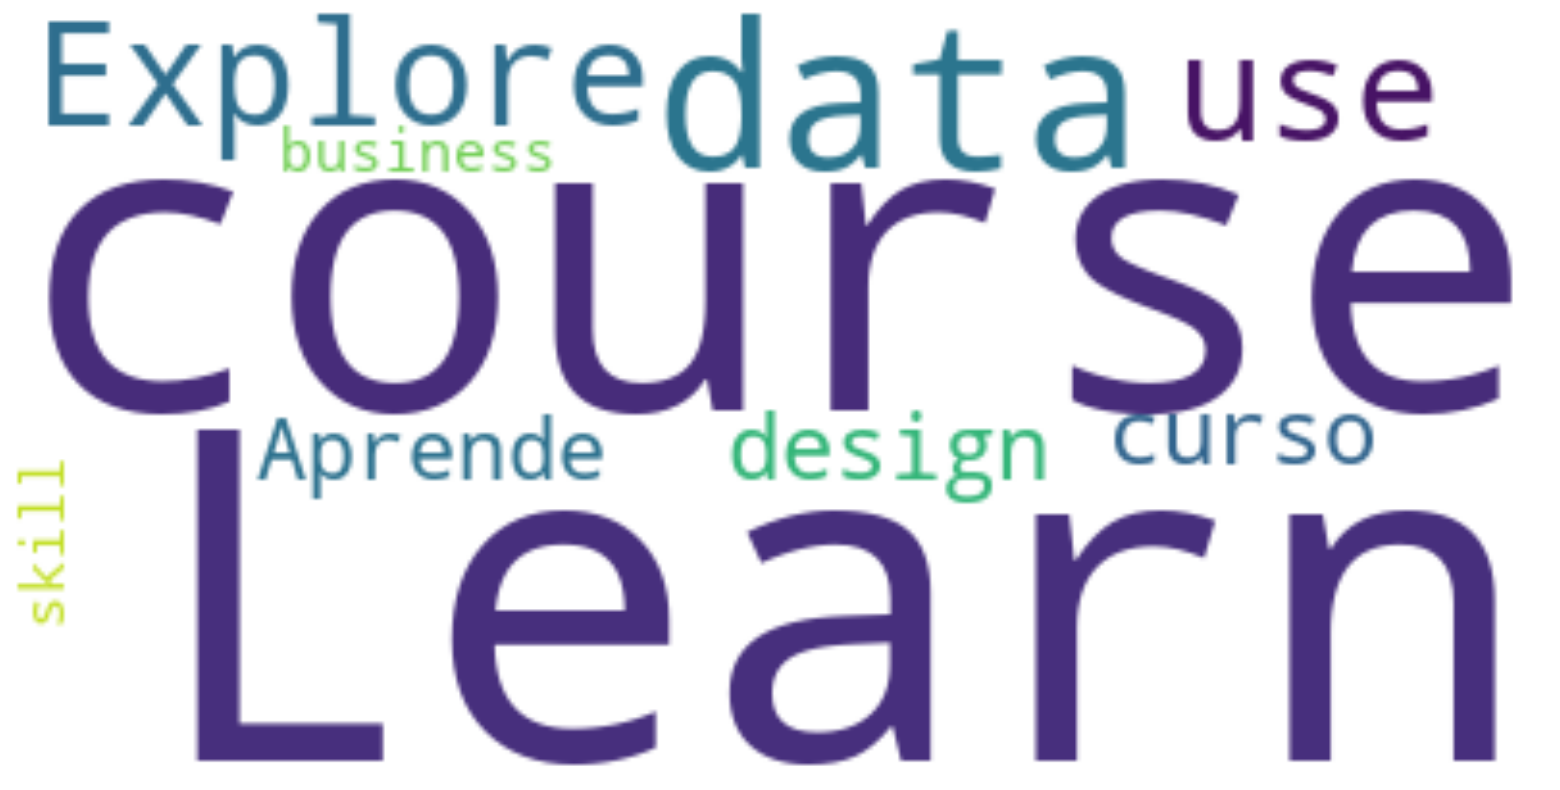

In [25]:
word_cloud("summary", 10)

Insight:
* Para saber con exactitud cuales son las palabras que mas se repiten podemos cambiar el valor de argumento "max_word = X" , donde X es el numero maximo de palabras que se mostrara en el wordcloud
* Haciendo un cambio al argumento "max_word = 10" podemos observar que existe una alta tendencia a que en el resumen se coloque algunas de las siguientes palabras: Learn o Aprender, course o curso, skill, data, use, entre otros.
* Esto nos ayuda a visualizar que si queremos aperturar un nuevo curso, una buena estrategia para el existo seria incorporar una de las palabras que estan dentro del wordcloud al resumen del curso que aperturaremos.

n_enrolled

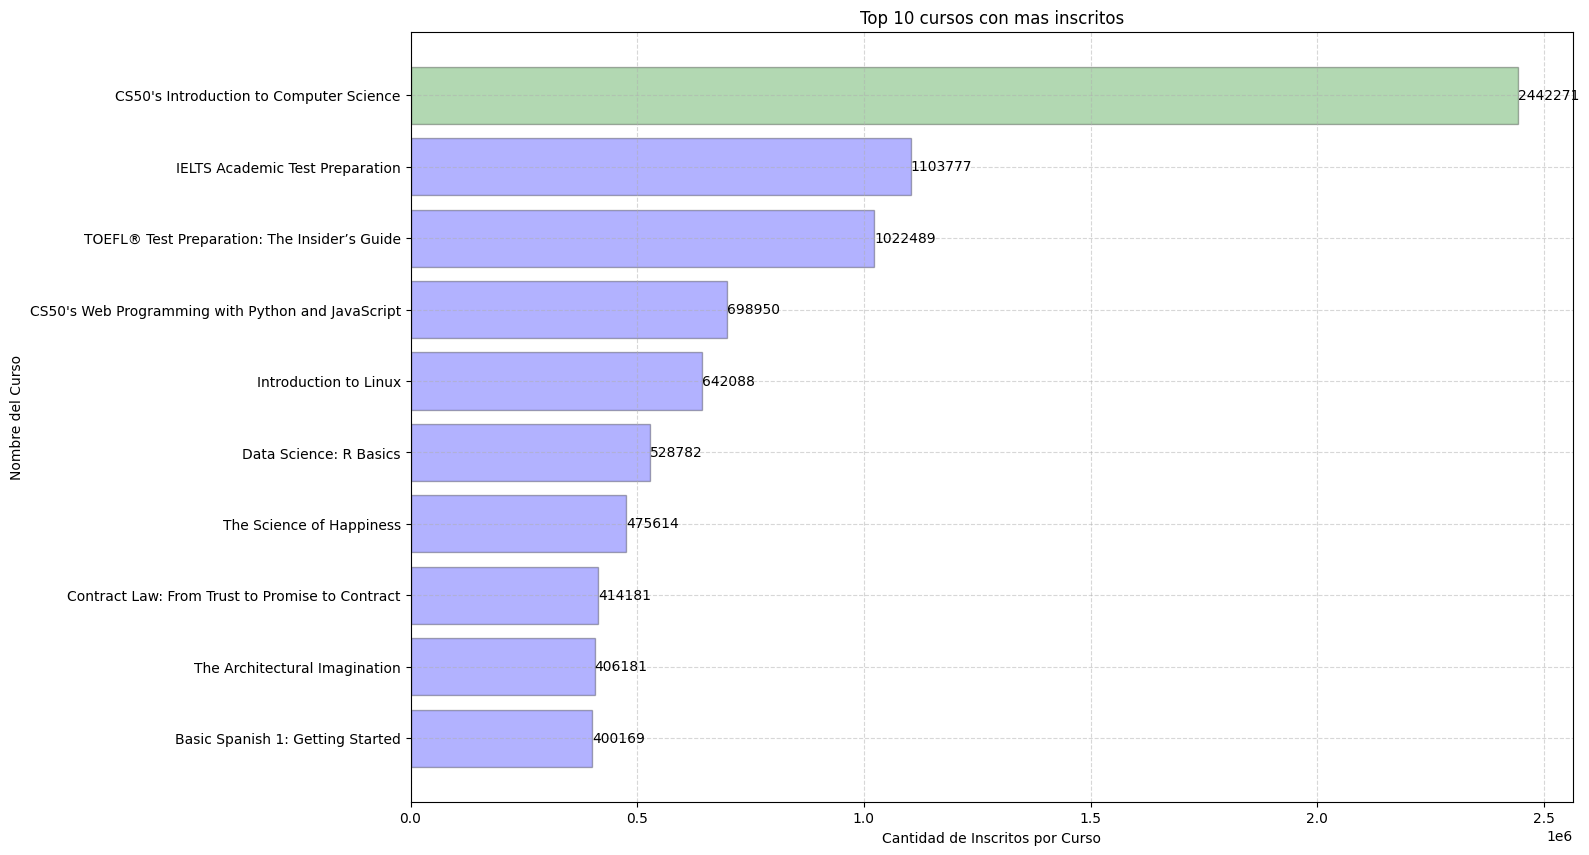

In [26]:
#Contamos:
conteo_enrolled = edx_courses[["title","n_enrolled"]].sort_values(by="n_enrolled", ascending=False)[0:10].sort_values(by="n_enrolled")

#Creamos la figura y ejes:
f, ax = plt.subplots(figsize=(15,10))
ax.barh(conteo_enrolled.title.values, conteo_enrolled.n_enrolled.values,  color=["blue", "blue", "blue", "blue", "blue","blue", "blue", "blue", "blue","green"], edgecolor="black",alpha=0.3)
ax.set_xlabel("Cantidad de Inscritos por Curso")
ax.set_ylabel("Nombre del Curso")
ax.set_title("Top 10 cursos con mas inscritos")
ax.grid(visible=True, ls="--", alpha=0.5)

#Iteramos para poner etiquetas:
for i in range(len(conteo_enrolled.n_enrolled.values)):
    ax.text(conteo_enrolled.n_enrolled.values[i], conteo_enrolled.title.values[i], int(conteo_enrolled.n_enrolled.values[i]), ha='left', va='center')
plt.show();

Insight:
* Podemos observar que una gran cantidad de alumnos inscritos se encuentran buscaron estudiar algun curso con respecto a Programacion, Ciencias de la Computacion o Preparacion para algun examen de ingles.
* En la actualidad el saber ingles es un requisito indispensable tanto para estudiar como para trabajar.

Course_type - Barras


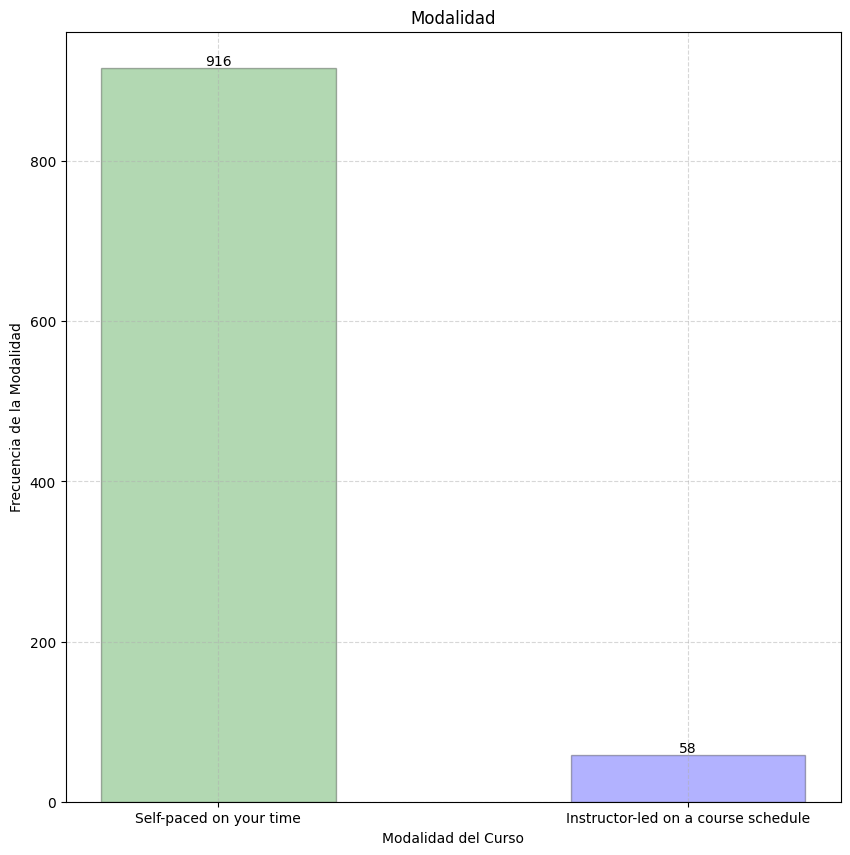

In [27]:
#Contamos:
conteo_inscr = edx_courses.course_type.value_counts()

#Creamos la figura y ejes:
f, ax = plt.subplots(figsize=(10,10))
ax.bar(conteo_inscr.index, conteo_inscr.values, width=0.5, edgecolor="black",color=["green", "blue"], alpha=0.3)
ax.set_ylabel("Frecuencia de la Modalidad")
ax.set_xlabel("Modalidad del Curso")
ax.set_title("Modalidad")
ax.grid(visible=True, ls="--", alpha=0.5)

#Iteramos para poner etiquetas:
for ind, val in enumerate(conteo_inscr):
    plt.text(ind, val, int(val), ha="center", va="bottom")
plt.show();


Insight:
* Podemos ver que la gran mayoria de los cursos son del tipo Self-paced. ¿Esto que quiere decir? Que el alumno puede hacerlo a su ritmo, es un curso asincronico.

institucion

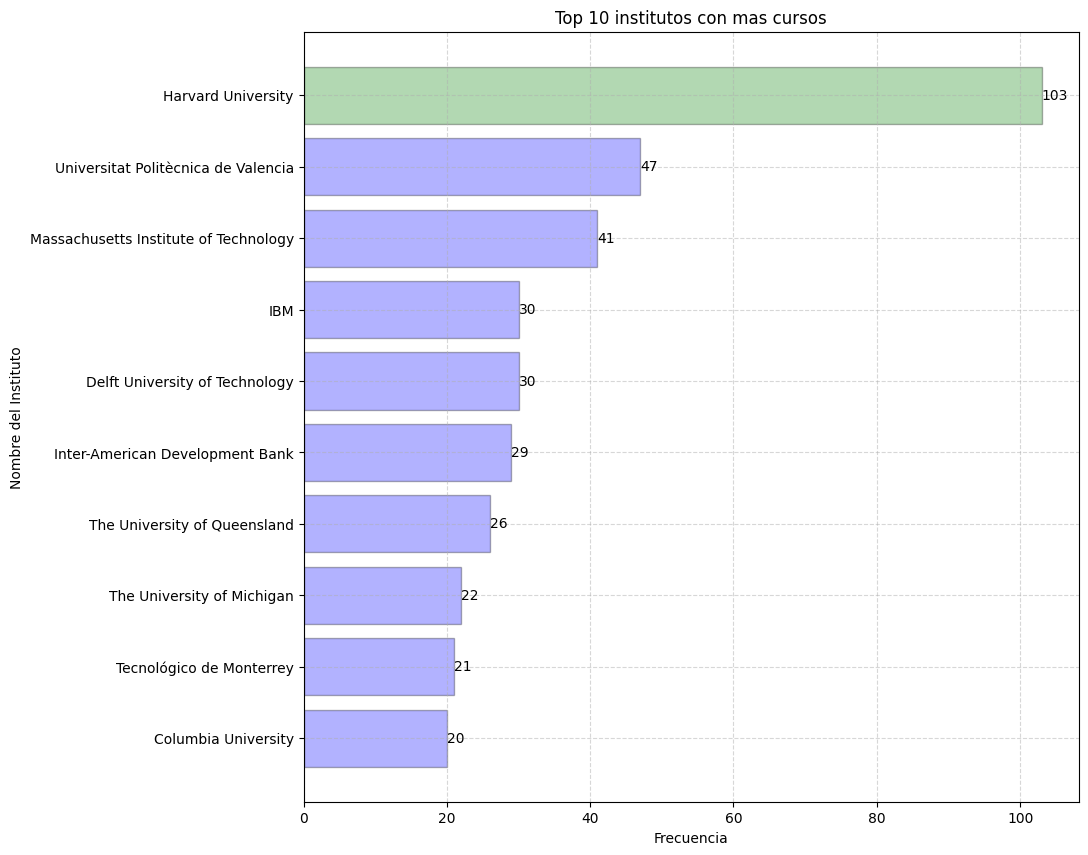

In [28]:
#Contamos:
conteo_inst = edx_courses.institution.value_counts()[0:10].sort_values()
#Creamos la figura y ejes:
f, ax = plt.subplots(figsize=(10,10))
ax.barh(conteo_inst.index, conteo_inst.values, color=["blue", "blue", "blue", "blue", "blue","blue", "blue", "blue", "blue","green"],edgecolor="black", alpha=0.3)
ax.set_xlabel("Frecuencia")
ax.set_ylabel("Nombre del Instituto")
ax.set_title("Top 10 institutos con mas cursos")
ax.grid(visible=True, ls="--", alpha=0.5)

#Iteramos para poner etiquetas:
for i in range(len(conteo_inst.values)):
    ax.text(conteo_inst.values[i], conteo_inst.index[i], int(conteo_inst.values[i]), ha='left', va='center')
plt.show();

Insight:
* Se puede observar que las universidades son las que mas ofrecen cursos para estudiar, en el caso de la primera Harvard es considerara una de las mejores universidades del mundo y por ello se sabe que cualquier curso que puedan impartir es uno de calidad.

instructor

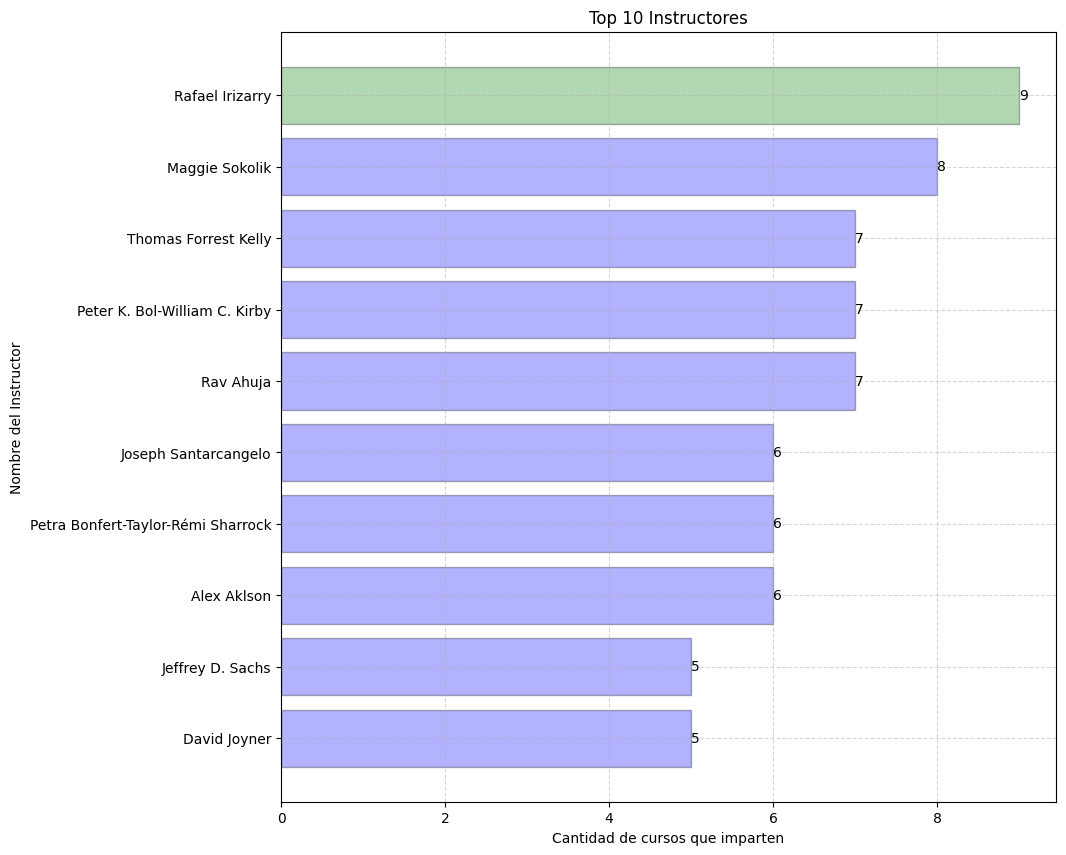

In [29]:
#Contamos:
conteo_instructor = edx_courses.instructors.value_counts()[0:10].sort_values()
#Creamos la figura y ejes:
f, ax = plt.subplots(figsize=(10,10))
ax.barh(conteo_instructor.index, conteo_instructor.values, color=["blue", "blue", "blue", "blue", "blue","blue", "blue", "blue", "blue","green"],edgecolor="black", alpha=0.3)
ax.set_xlabel("Cantidad de cursos que imparten")
ax.set_ylabel("Nombre del Instructor")
ax.set_title("Top 10 Instructores")
ax.grid(visible=True, ls="--", alpha=0.5)

#Iteramos para poner etiquetas:
for i in range(len(conteo_instructor.values)):
    ax.text(conteo_instructor.values[i], conteo_instructor.index[i], int(conteo_instructor.values[i]), ha='left', va='center')
plt.show();

level

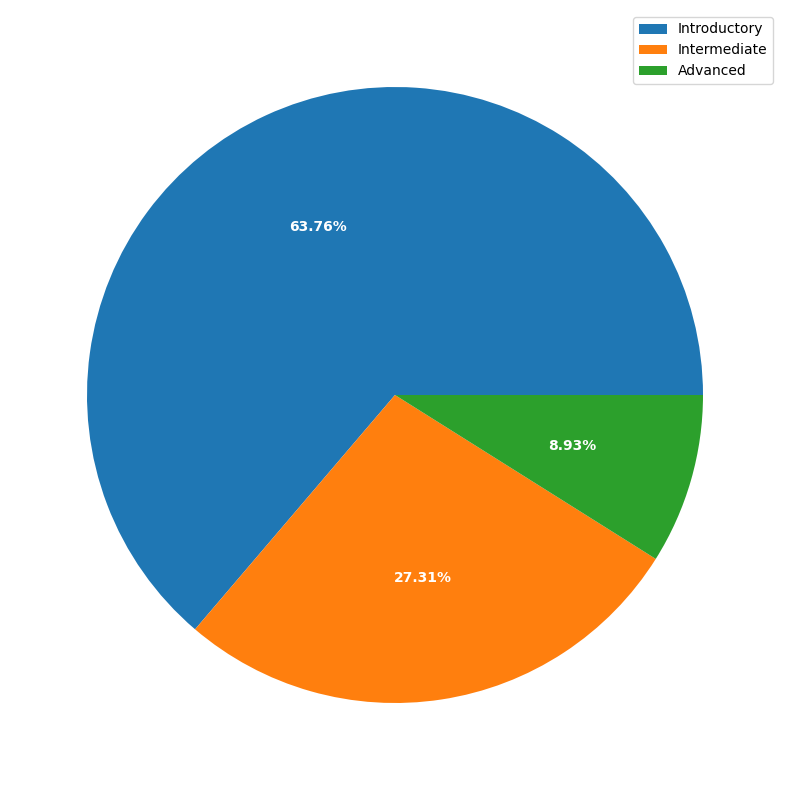

In [30]:
#Contamos:
conteo_level = edx_courses.level.value_counts().sort_values(ascending=False)


#Creamos la figura y ejes:
f, ax = plt.subplots(figsize=(20,10))

#Grafico de Pie
# x, y = np.unique(edx_courses.Level, return_counts=True)
ax.pie(conteo_level.values, labels=conteo_level.index, autopct="%.2f%%",textprops={"fontweight":"bold","color": "white"})
ax.legend()
plt.show();

Insight:
* Del total de los cursos podemos observar que los mas ofertados son los de un nivel "introductorio".

subject

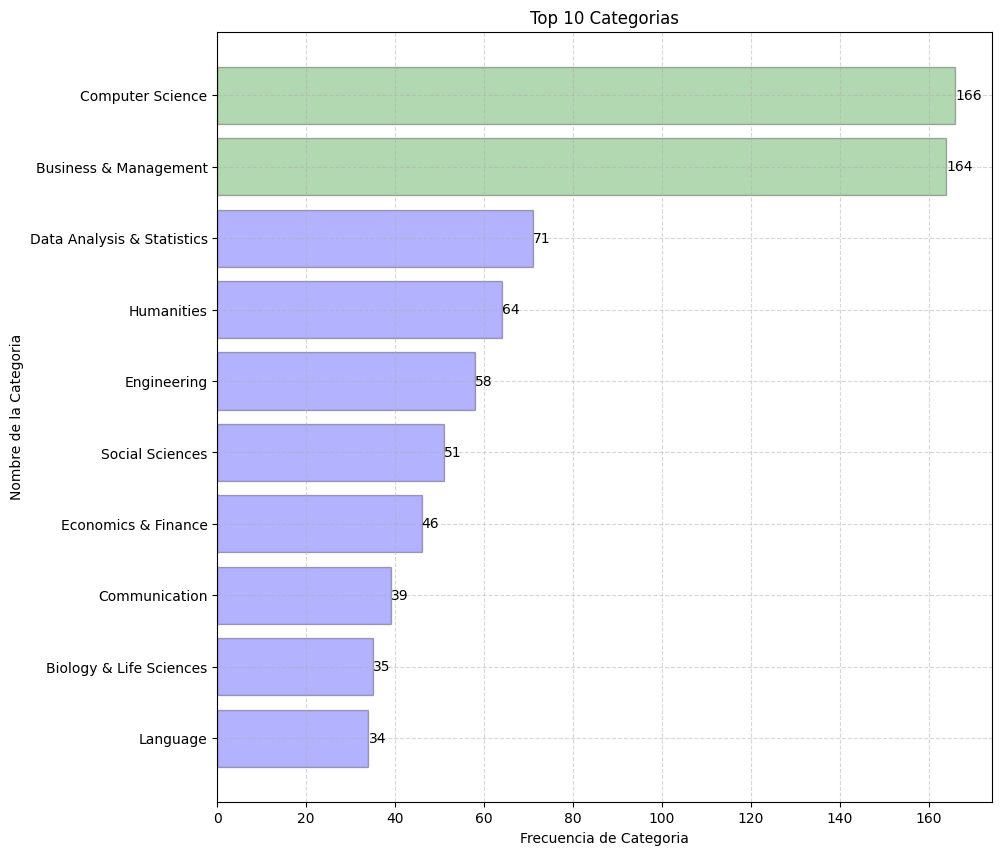

In [31]:
#Contamos:
conteo_subject = edx_courses.subject.value_counts()[0:10].sort_values()
#Creamos la figura y ejes:
f, ax = plt.subplots(figsize=(10,10))
ax.barh(conteo_subject.index, conteo_subject.values, color=["blue", "blue", "blue", "blue", "blue","blue", "blue", "blue", "green","green"], edgecolor="black", alpha=0.3)
ax.set_xlabel("Frecuencia de Categoria")
ax.set_ylabel("Nombre de la Categoria")
ax.set_title("Top 10 Categorias")
ax.grid(visible=True, ls="--", alpha=0.5)

#Iteramos para poner etiquetas:
for i in range(len(conteo_subject.values)):
    ax.text(conteo_subject.values[i], conteo_subject.index[i], int(conteo_subject.values[i]), ha='left', va='center')
plt.show();

Insight:
* Al igual que en la columna titulo una gran cantidad de cursos estan dirigidos a enseñar Ciencias en sus diferentes ramas, sin embargo tambien se incluyen materias como lenguaje y comunicacion

language

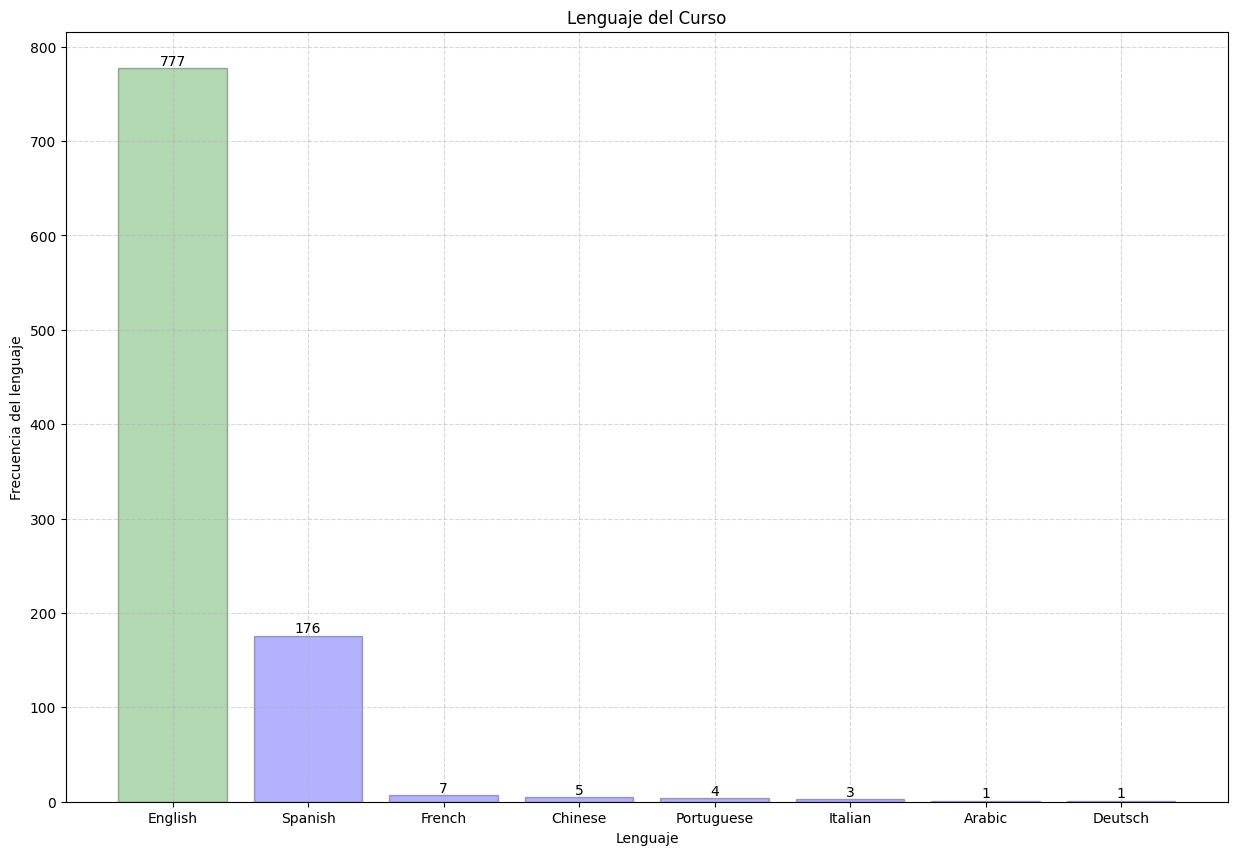

In [32]:
#Contamos:
conteo_language = edx_courses.language.value_counts()[0:10].sort_values(ascending=False)
#Creamos la figura y ejes:
f, ax = plt.subplots(figsize=(15,10))
ax.bar(conteo_language.index, conteo_language.values, color=["green","blue", "blue", "blue", "blue", "blue","blue", "blue"], edgecolor="black", alpha=0.3)
ax.set_ylabel("Frecuencia del lenguaje")
ax.set_xlabel("Lenguaje")
ax.set_title("Lenguaje del Curso")
ax.grid(visible=True, ls="--", alpha=0.5)

#Iteramos para poner etiquetas:
for i in range(len(conteo_language.values)):
    ax.text(conteo_language.index[i], conteo_language.values[i], int(conteo_language.values[i]), ha='center', va='bottom')
plt.show();

Insight:
* Observamos que la gran mayoria de los cursos son impartidos en ingles , luego de esto español. 
* En el caso de crear un nuevo curso una recomendacion seria hacerlo en algun idioma que no tenga tanta frecuencia ¿Por que? Porque asi estariamos entrando en un nuevo nicho o mercado.

subtitles

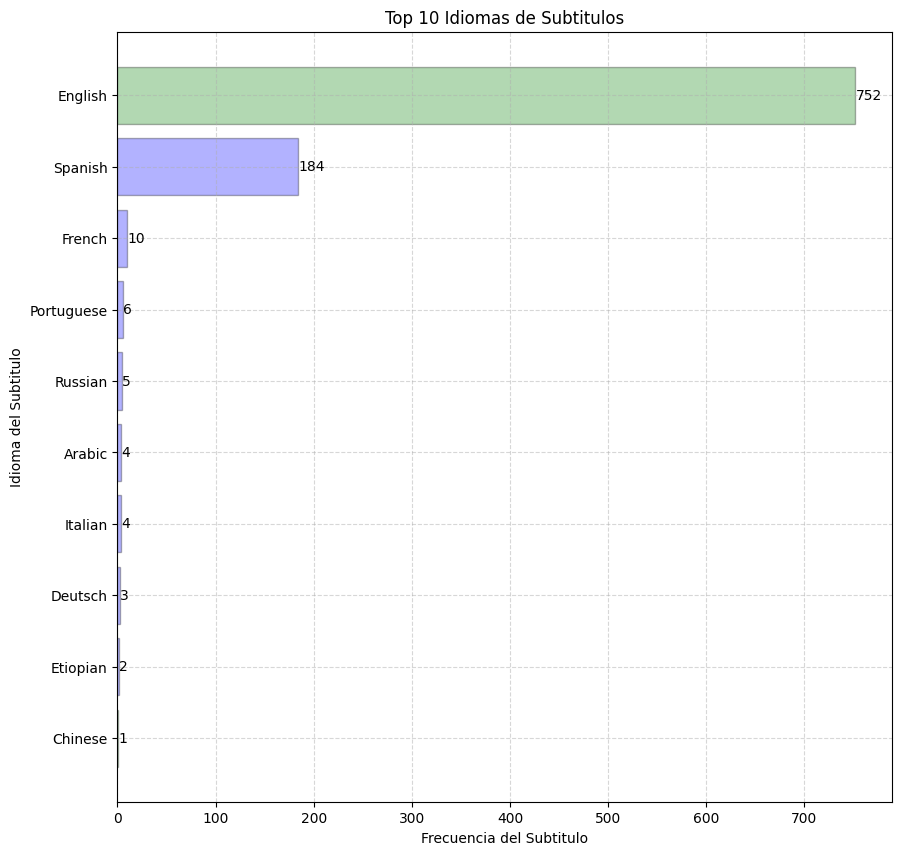

In [33]:
#Contamos:
conteo_subtitles = edx_courses.subtitles.value_counts()[0:10].sort_values()
#Creamos la figura y ejes:
f, ax = plt.subplots(figsize=(10,10))
ax.barh(conteo_subtitles.index, conteo_subtitles.values,color=["green","blue","blue", "blue", "blue", "blue", "blue","blue", "blue"], edgecolor="black", alpha=0.3)
ax.set_ylabel("Idioma del Subtitulo")
ax.set_xlabel("Frecuencia del Subtitulo")
ax.set_title("Top 10 Idiomas de Subtitulos")
ax.grid(visible=True, ls="--", alpha=0.5)

#Iteramos para poner etiquetas:
for i in range(len(conteo_subtitles.values)):
    ax.text(conteo_subtitles.values[i], conteo_subtitles.index[i], int(conteo_subtitles.values[i]), ha='left', va='center')
plt.show();

Insight:
* Tal como pudimos observar en los idiomas que mas se imparten en los cursos siendo estos ingles y español, pasa lo mismo con los subtitulos por lo que se entiende que en un curso un gran porcentaje de inscritos lee ingles o español.

course_effort

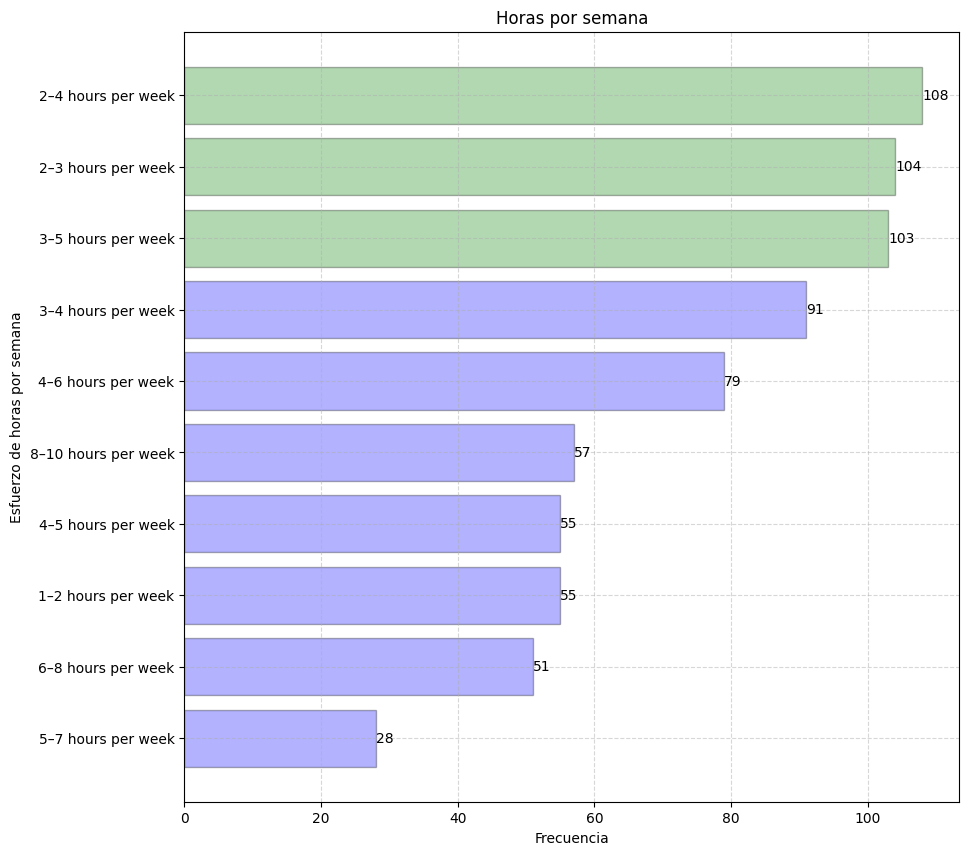

In [34]:
#Contamos:
conteo_effort = edx_courses.course_effort.value_counts()[0:10].sort_values()
#Creamos la figura y ejes:
f, ax = plt.subplots(figsize=(10,10))
ax.barh(conteo_effort.index, conteo_effort.values, color=["blue","blue","blue", "blue", "blue", "blue", "blue","green", "green","green"], edgecolor="black" ,alpha=0.3)
ax.set_ylabel("Esfuerzo de horas por semana")
ax.set_xlabel("Frecuencia")
ax.set_title("Horas por semana")
ax.grid(visible=True, ls="--", alpha=0.5)

#Iteramos para poner etiquetas:
for i in range(len(conteo_effort.values)):
    ax.text(conteo_effort.values[i], conteo_effort.index[i], str(conteo_effort.values[i]), ha='left', va='center')
plt.show()

Insight:
* Algo muy importante para las personas que estudian un curso online y a su ritmo es el tiempo que le deben invertir semanalmente para poder absorver los conocimientos impartidos, basandonos en la grafica podemos ver que existe una tendencia a realizar un minimo de 2 a 4 horas y las diferentes combinaciones que existan.

course_lenght

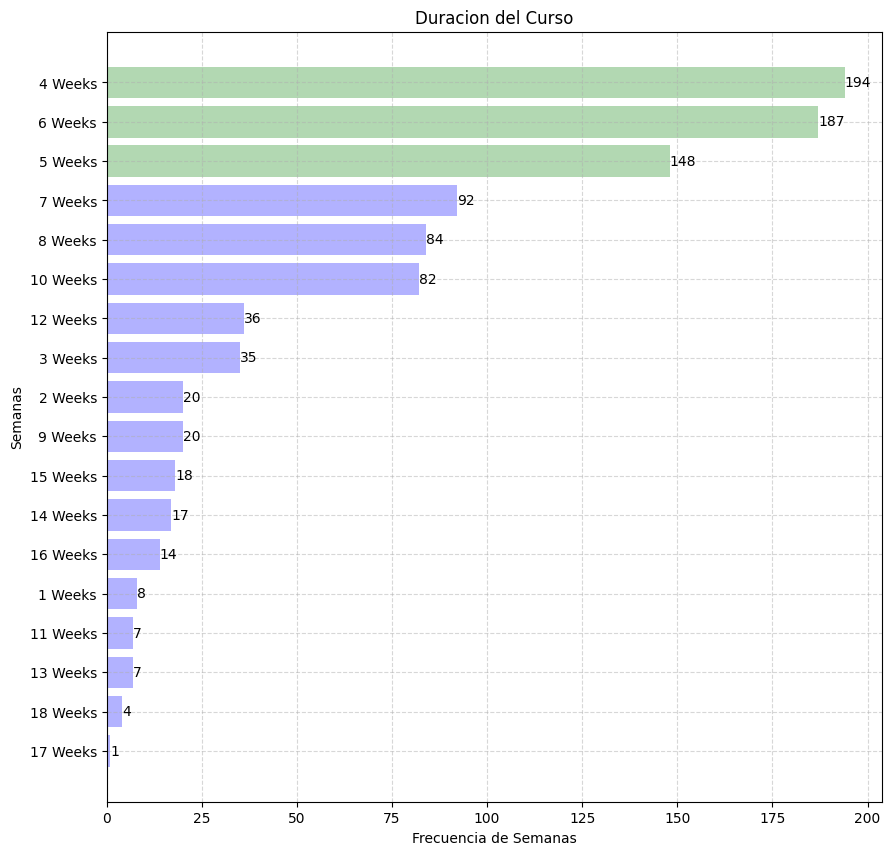

In [35]:
#Contamos:
conteo_length = edx_courses.course_length.value_counts()[0:20].sort_values()
#Creamos la figura y ejes:
f, ax = plt.subplots(figsize=(10,10))
ax.barh(conteo_length.index, conteo_length.values, color=["blue","blue","blue", "blue", "blue", "blue", "blue","blue", "blue","blue","blue", "blue", "blue", "blue", "blue","green", "green","green"], alpha=0.3)
ax.set_ylabel("Semanas")
ax.set_xlabel("Frecuencia de Semanas")
ax.set_title("Duracion del Curso")
ax.grid(visible=True, ls="--", alpha=0.5)

#Iteramos para poner etiquetas:
for i in range(len(conteo_length.values)):
    ax.text(conteo_length.values[i], conteo_length.index[i], str(conteo_length.values[i]), ha='left', va='center')
plt.show()

Insight:
* Observamos que los cursos tienden a ser cortos. En proximas variables veremos cual es la preferencia de los inscritos en base a las semanas.

certificate_price

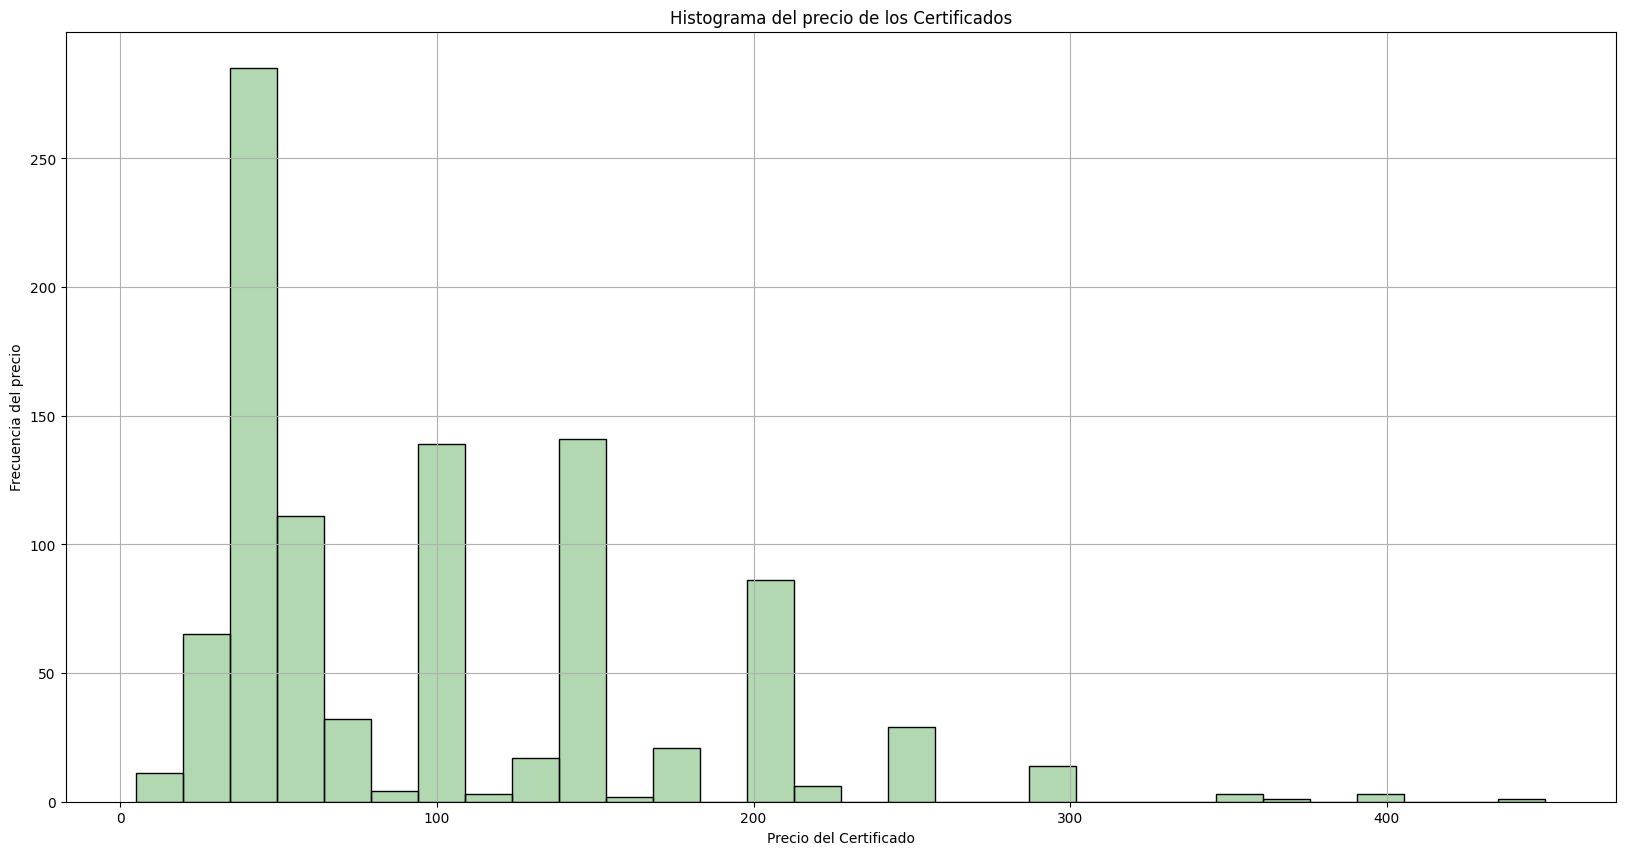

In [36]:
#Creamos la figura y ejes:
f, ax = plt.subplots(figsize=(20,10))

sns.histplot(x=edx_courses.certificate_price, bins=30, color="green", alpha=0.3)
ax.set_ylabel("Frecuencia del precio")
ax.set_xlabel("Precio del Certificado")
ax.set_title("Histograma del precio de los Certificados")
ax.grid(visible=True)

plt.show();

Insight:
* El valor del certificado varia considerablemente sin embargo existen 4 picos a considerar y evaluar para poder colocar un precio a nuestros curso. 
* El valor mas repetido seria de 49.90 y de alli se va distendiendo en el histograma a traves del eje X.

course_description

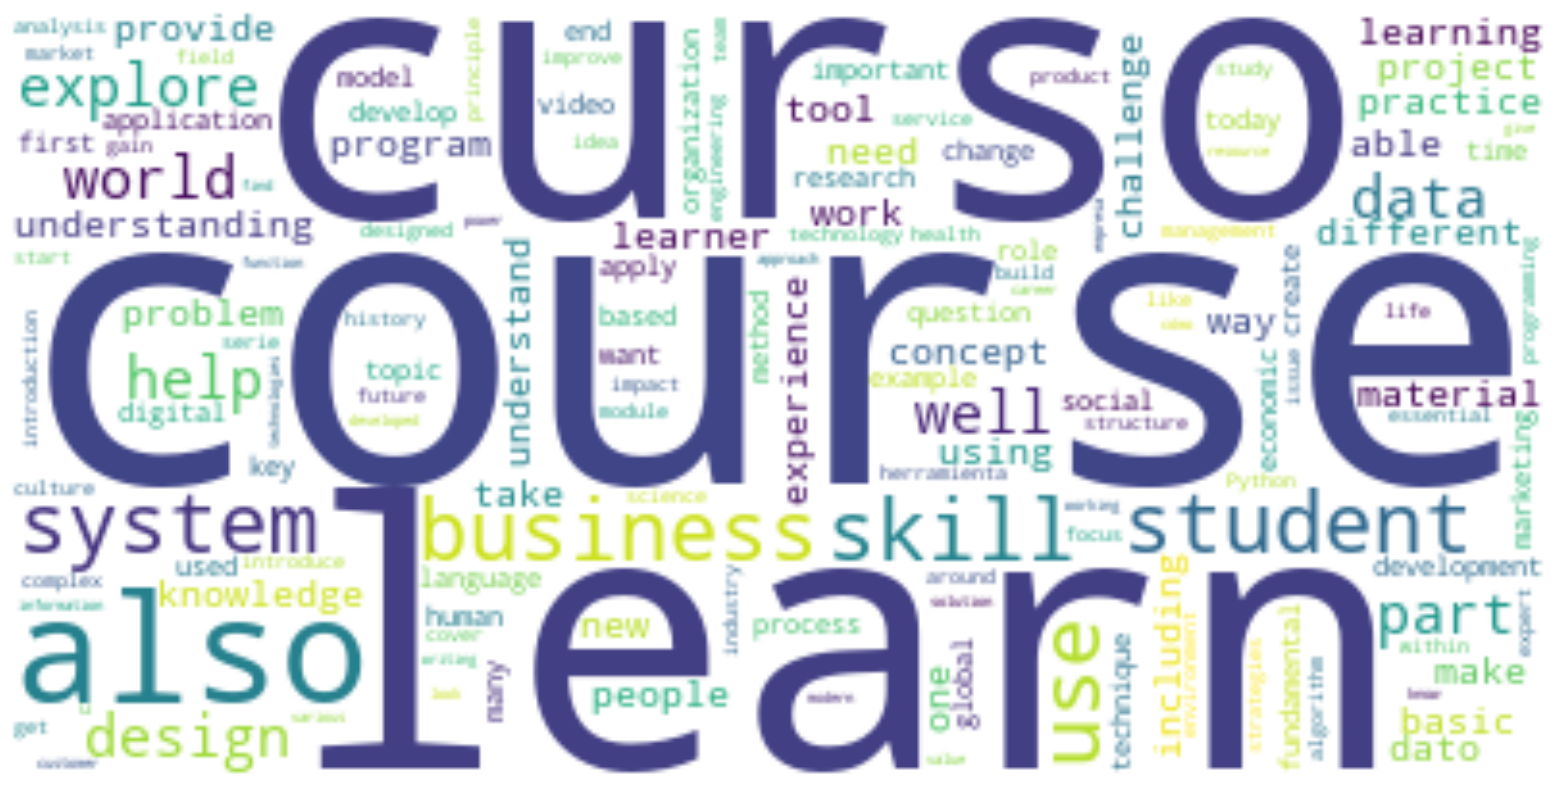

In [37]:
word_cloud("course_description")

Insight:
* Podemos observar que las palabras que mas se repiten en la descripcion del curso son las mas grandes por ende serian: learn, course o curso, business, entre otras.


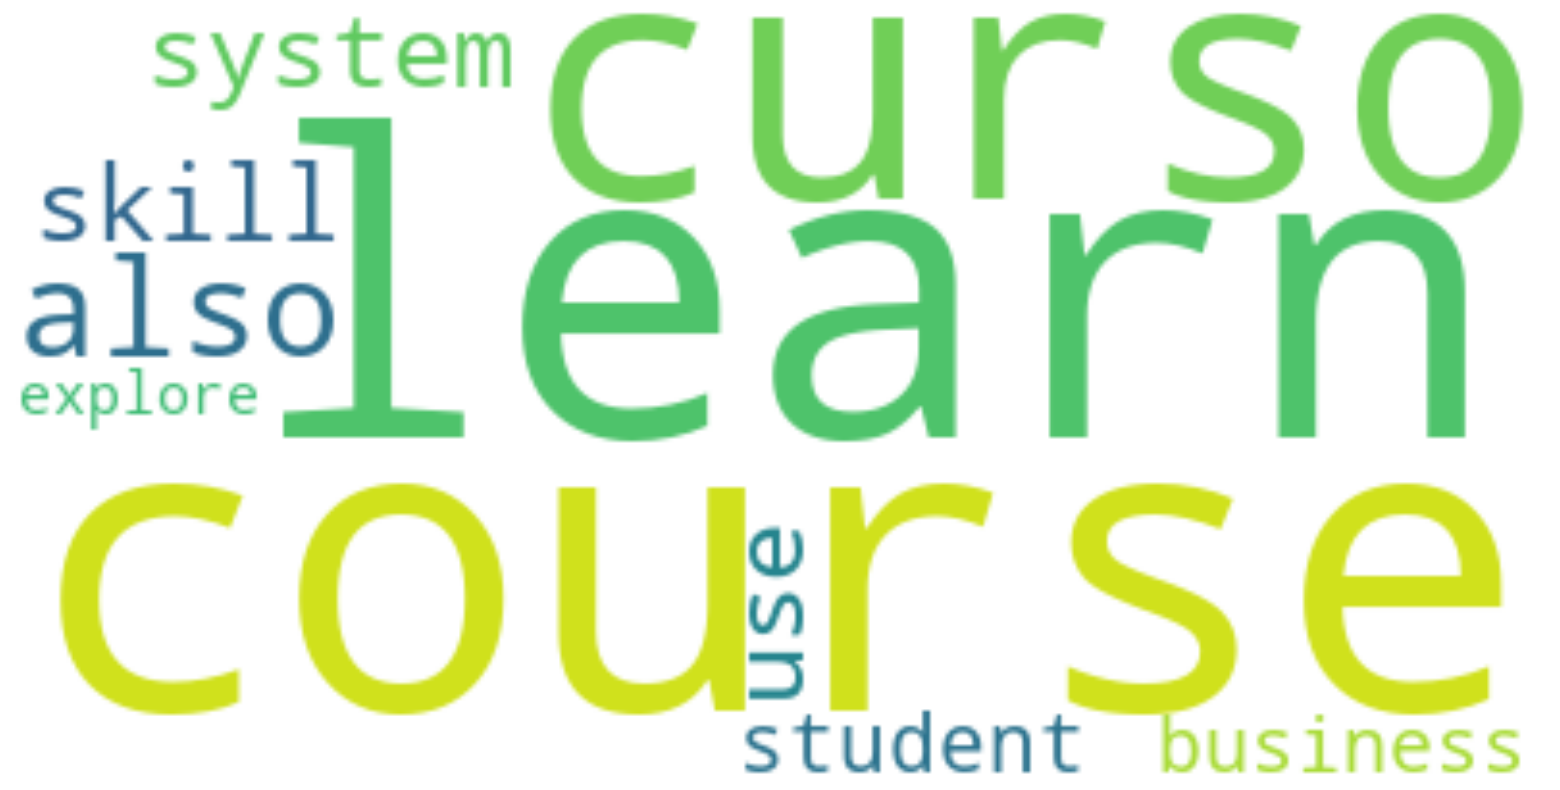

In [38]:
word_cloud("course_description", 10)

Insight:
* Para saber con exactitud cuales son las palabras que mas se repiten podemos cambiar el valor de argumento "max_word = X" , donde X es el numero maximo de palabras que se mostrara en el wordcloud
* Haciendo un cambio al argumento "max_word = 10" podemos observar que existe una alta tendencia a que los cursos que se imparten en su descripcion tengan las palabras course o curso, system, students.

course_syllabus

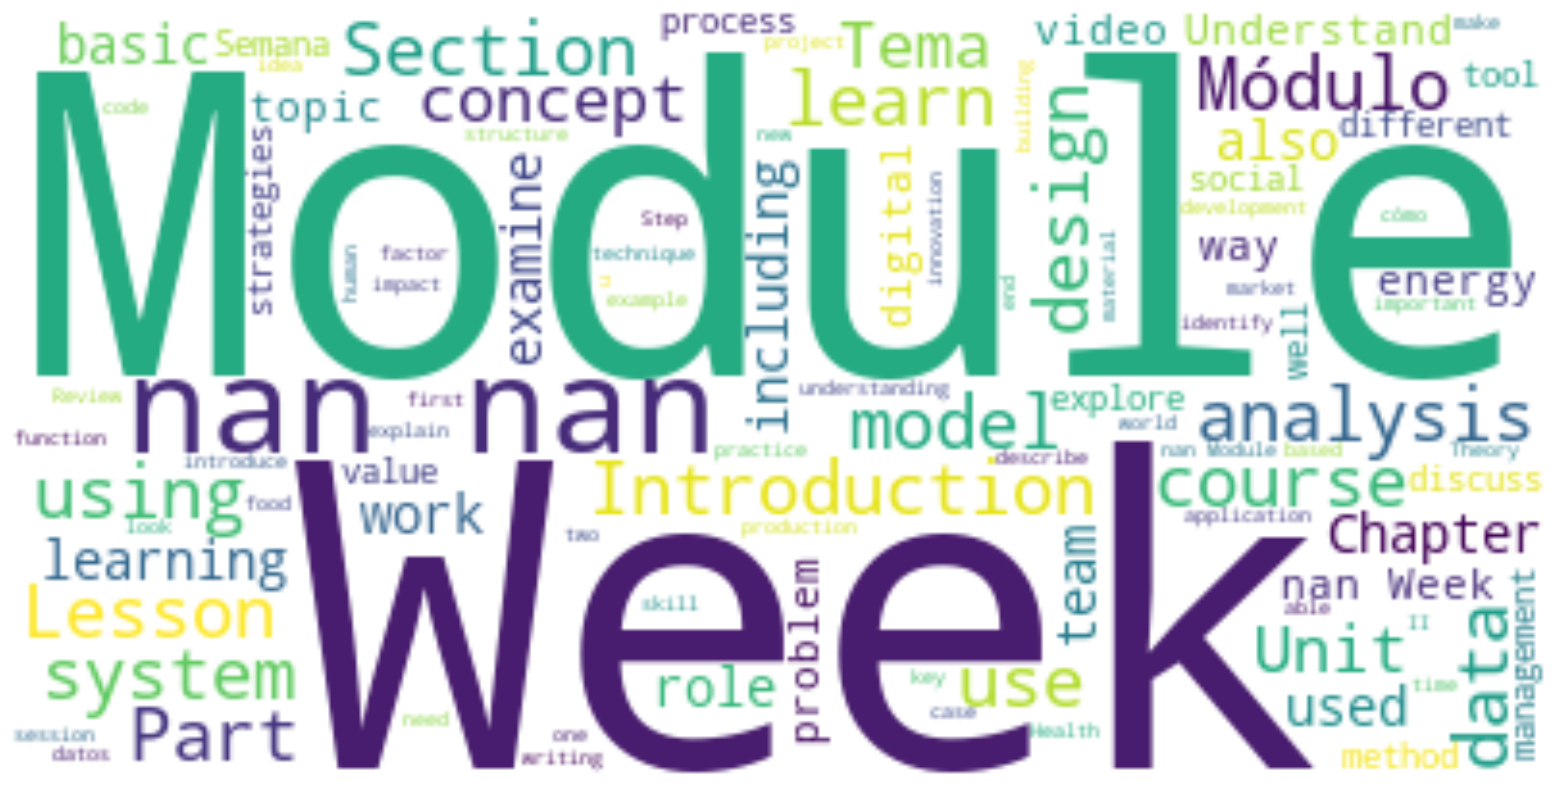

In [39]:
word_cloud("course_syllabus")

Insight:
* Podemos observar que las palabras que mas se repiten en la descripcion del curso son las mas grandes por ende serian: module o modulo, week, introduction, data, entre otras.

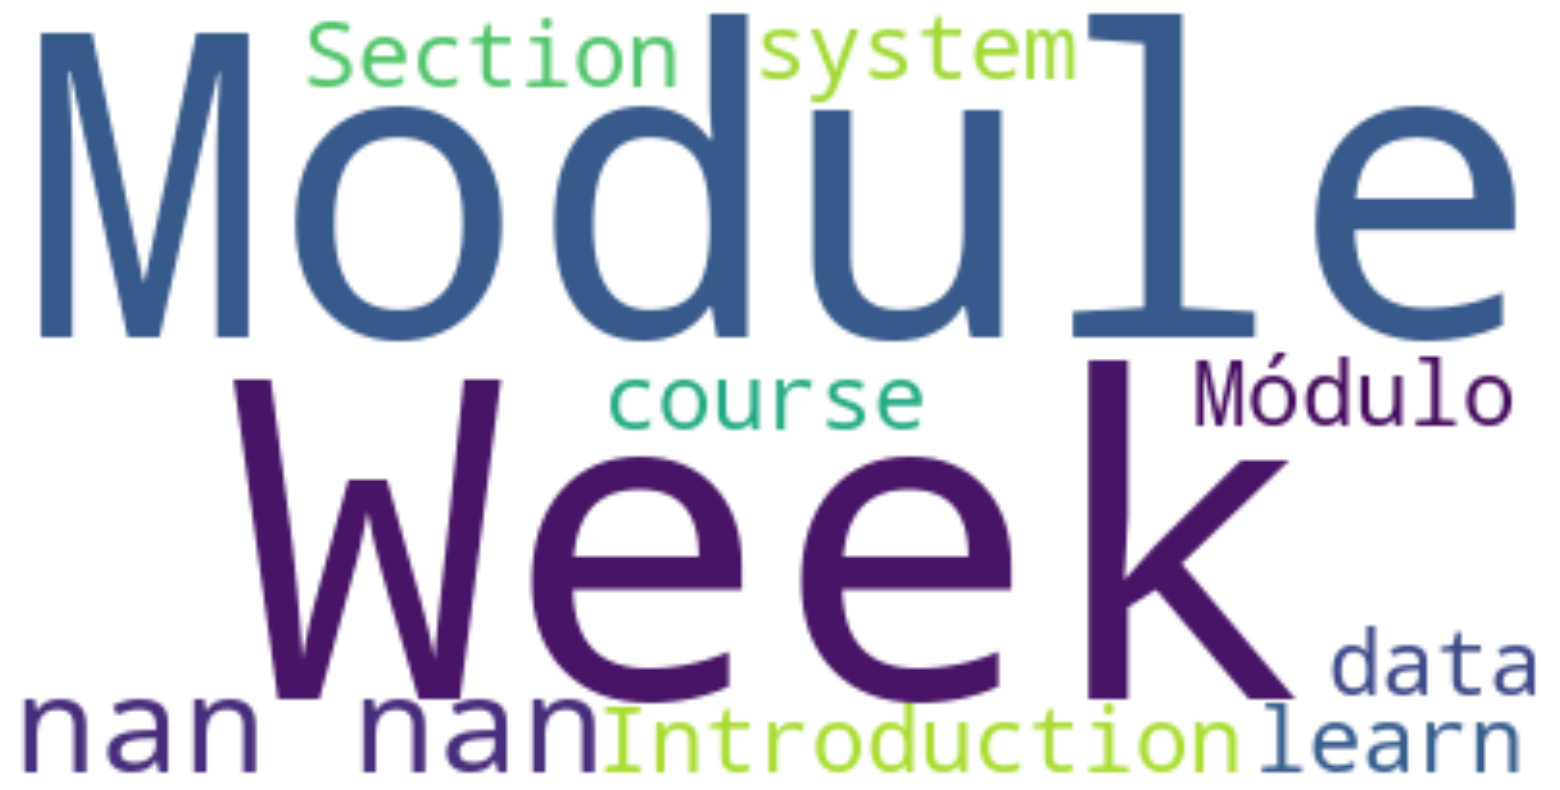

In [40]:
word_cloud("course_syllabus", 10)

Insight:
* Para saber con exactitud cuales son las palabras que mas se repiten podemos cambiar el valor de argumento "max_word = X" , donde X es el numero maximo de palabras que se mostrara en el wordcloud
* Haciendo un cambio al argumento "max_word = 10" podemos observar que existe una alta tendencia a que los cursos que se imparten en su plan de estudios tengan las palabras course o curso, system, students. Esto se entiende debido a que en los planes de estudio al momento de inscribirse se debe ingresar toda esta informacion por alumno.

In [41]:
edx_courses.head(2)

title  \
0                                How to Learn Online   
1  Programming for Everybody (Getting Started wit...   

                                             summary  n_enrolled  \
0  Learn essential strategies for successful onli...    124980.0   
1  This course is a "no prerequisite" introductio...    293864.0   

               course_type                 institution  \
0  Self-paced on your time                         edX   
1  Self-paced on your time  The University of Michigan   

                               instructors         level  \
0  Nina Huntemann-Robyn Belair-Ben Piscopo  Introductory   
1                        Charles Severance  Introductory   

                        subject language subtitles       course_effort  \
0  Education & Teacher Training  English   English  2–3 hours per week   
1              Computer Science  English   English  2–4 hours per week   

  course_length price certificate  certificate_price  \
0       2 Weeks  FREE         YES               49.0   
1       7 Weeks  FREE         YES               49.0   

                                  course_description  \
0  Designed for those who are new to elearning, t...   
1  This course aims to teach everyone the basics ...   

                                     course_syllabus  
0  Welcome - We start with opportunities to meet ...  
1                                                nan

# Analisis Multivarible

Para el analisis multivariable se procede a realizar tablas pivot a modo de entender mejor la data y extraer informacion relevante de la misma.

In [42]:
multiva_1 = pd.pivot_table(edx_courses, index=["course_type"], values=["n_enrolled", "certificate_price"],  aggfunc=["sum", "mean"], fill_value=0)
multiva_1

sum             \
                                    certificate_price n_enrolled   
course_type                                                        
Instructor-led on a course schedule          11444.00    2370772   
Self-paced on your time                      86410.86   43069537   

                                                 mean                
                                    certificate_price    n_enrolled  
course_type                                                          
Instructor-led on a course schedule        197.310345  40875.379310  
Self-paced on your time                     94.335000  47019.145197

Insight - [course_type vs n_enrolled & certificate_price]
* Podemos observar que una gran cantidad de alumnos prefieren estudiar a su propio ritmo que en un horario especifico, para ser mas especificos un 94% prefiere esta modalidad de estudio.
* Tambien es importante notar que el precio para obtener el certificado influye en el proceso de eleccion de la modalidad de estudio y esto es porque existe una diferencia notable entre lo que se paga en promedio por un certificado de una clase en vivo a una clase grabada.
* Tiene una gran influencia el pago del certificad, ya que en promedio el precio de "a tu ritmo" tendria un valor de $94 USD en comparacion a uno donde tendras un instructor en un horario especifico pero por el valor promedio de $197 USD.

In [43]:
multiva_2 = pd.pivot_table(edx_courses, index=["level"], values=["n_enrolled", "certificate_price"],  aggfunc=["sum", "mean"], fill_value=0)
multiva_2

sum                         mean              
             certificate_price n_enrolled certificate_price    n_enrolled
level                                                                    
Advanced              16180.97    2999021        185.988161  34471.505747
Intermediate          26495.89   10061847         99.608609  37826.492481
Introductory          55178.00   32379441         88.853462  52140.806763

Insight - [level vs n_enrolled & certificate_price]
* Podemos observar que una gran cantidad de alumnos prefieren estudiar cursos de nivel introductorio en comparacion a los demas. Una posible causa de esta preferencia es debido a que en este nivel por lo general no se piden mayores requisitos o conocimiento previo, solo se necesita tiempo y un dispositivo para ver las clases.
* Preferencias de los alumnos: 
    * Un 71% prefiere "introductorio" por la simplicidad de requisitos y que para estudiar no necesitas conocimientos previos.
    * Un 22% prefiere "intermedio" sin embargo podemos intuir que para este nivel debes tener un conocimiento intermedio del programa a cursar.
    * Un 7% prefiere "avanzado" ya para este nivel se debe tener un grado academico universitario asi como un elevado conocimiento previo de la materia.
* Basandonos solamente en el nivel del curso el precio promedio mas bajo de un certificadoes de $88 USD.

In [44]:
multiva_3 = pd.pivot_table(edx_courses, index=["language"], values=["n_enrolled", "certificate_price"],  aggfunc=["sum", "mean"], fill_value=0)
multiva_3

sum                         mean              
           certificate_price n_enrolled certificate_price    n_enrolled
language                                                               
Arabic                 49.00          0         49.000000      0.000000
Chinese               565.00     118915        113.000000  23783.000000
Deutsch                49.00      10657         49.000000  10657.000000
English             87137.99   41157706        112.146705  52970.020592
French                773.00     161848        110.428571  23121.142857
Italian               147.00     242187         49.000000  80729.000000
Portuguese            248.00      44021         62.000000  11005.250000
Spanish              8885.87    3704975         50.487898  21050.994318

Insight - [language vs n_enrolled & certificate_price]
* A primera viste podemos ver que los cursos dictados en ingles son los que tienen una mayor cantidad de inscritos , luego le sigue los que son dictados en español.
* Importante notar que los cursos dictados en Arabic no poseen estudiantes inscritos.
* Basandonos solamente en el idioma en que se dictac los cursos el precio promedio mas bajo de un certificado es $49 USD.

In [45]:
multiva_4 = pd.pivot_table(edx_courses, index=["language", "subtitles"], values=["n_enrolled", "certificate_price"],  aggfunc=["sum", "mean"], fill_value=0)
multiva_4

sum                         mean  \
                      certificate_price n_enrolled certificate_price   
language   subtitles                                                   
Arabic     Arabic                 49.00          0         49.000000   
Chinese    Chinese               139.00      18489        139.000000   
           English               426.00     100426        106.500000   
Deutsch    Deutsch                49.00      10657         49.000000   
English    Arabic                347.00      35999        115.666667   
           Deutsch               198.00     426244         99.000000   
           English             84342.99   38936257        113.364234   
           Etiopian               54.00      53144         27.000000   
           French                347.00      53692        115.666667   
           Italian                49.00      39398         49.000000   
           Portuguese            198.00     156298         99.000000   
           Russian               221.00      60674         44.200000   
           Spanish               784.00    1249029         65.333333   
French     French                773.00     161848        110.428571   
Italian    Italian               147.00     242187         49.000000   
Portuguese Portuguese            248.00      44021         62.000000   
Spanish    English               322.00      42374         80.500000   
           Spanish              8563.87    3662601         49.789942   

                                      
                          n_enrolled  
language   subtitles                  
Arabic     Arabic           0.000000  
Chinese    Chinese      18489.000000  
           English      25106.500000  
Deutsch    Deutsch      10657.000000  
English    Arabic       11999.666667  
           Deutsch     213122.000000  
           English      52333.678763  
           Etiopian     26572.000000  
           French       17897.333333  
           Italian      39398.000000  
           Portuguese   78149.000000  
           Russian      12134.800000  
           Spanish     104085.750000  
French     French       23121.142857  
Italian    Italian      80729.000000  
Portuguese Portuguese   11005.250000  
Spanish    English      10593.500000  
           Spanish      21294.191860

Insight - [language & subtitles vs n_enrolled & certificate_price]
* Podemos observar que de todos los idiomas en los que se dictan los cursos, solamente ingles posee subtitulos en 7 idiomas diferentes al hablado. Lo cual hace que sea mas facil obtener alumnos en muchas partes del mundo debido a que bien si no entienden el idioma que se habla pueden leer en su idioma natal y entender al respecto.
* Seguido del ingles como principal idioma en los cursos esta el español asi como el chino con 1 idioma diferente al hablado, sin embargo el español posee un gran numero de estudiantes inscritos en los cursos donde lo hablan o puede ser leido.
* Basandonos solamente en el idioma en que se dictac los cursos y el subtitulo el precio promedio mas bajo de un certificado es $44 USD.

In [46]:
multiva_5 = pd.pivot_table(edx_courses, index=["level","language"], values=["n_enrolled", "certificate_price"],  aggfunc=["sum", "mean"], fill_value=0)
multiva_5

sum                         mean  \
                        certificate_price n_enrolled certificate_price   
level        language                                                    
Advanced     Arabic                  0.00          0               NaN   
             Chinese                 0.00          0               NaN   
             Deutsch                 0.00          0               NaN   
             English             15808.00    2914517        195.160494   
             French                  0.00          0               NaN   
             Italian                49.00      24667         49.000000   
             Portuguese              0.00          0               NaN   
             Spanish               323.97      59837         64.794000   
Intermediate Arabic                  0.00          0               NaN   
             Chinese                 0.00          0               NaN   
             Deutsch                 0.00          0               NaN   
             English             24190.99    9264230        108.968423   
             French                375.00     115730         93.750000   
             Italian                49.00      35058         49.000000   
             Portuguese             25.00       8771         25.000000   
             Spanish              1855.90     638058         48.839474   
Introductory Arabic                 49.00          0         49.000000   
             Chinese               565.00     118915        113.000000   
             Deutsch                49.00      10657         49.000000   
             English             47139.00   28978959         99.449367   
             French                398.00      46118        132.666667   
             Italian                49.00     182462         49.000000   
             Portuguese            223.00      35250         74.333333   
             Spanish              6706.00    3007080         50.421053   

                                        
                            n_enrolled  
level        language                   
Advanced     Arabic                NaN  
             Chinese               NaN  
             Deutsch               NaN  
             English      35981.691358  
             French                NaN  
             Italian      24667.000000  
             Portuguese            NaN  
             Spanish      11967.400000  
Intermediate Arabic                NaN  
             Chinese               NaN  
             Deutsch               NaN  
             English      41730.765766  
             French       28932.500000  
             Italian      35058.000000  
             Portuguese    8771.000000  
             Spanish      16791.000000  
Introductory Arabic           0.000000  
             Chinese      23783.000000  
             Deutsch      10657.000000  
             English      61137.044304  
             French       15372.666667  
             Italian     182462.000000  
             Portuguese   11750.000000  
             Spanish      22609.624060

Insight - [level & language vs n_enrolled & certificate_price]
* Level Advanced:
    * Lo primero que podemos observar es una gran cantidad de alumnos inscritos en los cursos impartidos en el idioma ingles, seguido del español.
    * Solamente 3 idiomas son los que poseen cursos Advanced los cuales son Español, Ingles e Italiano.
    * Basandonos solamente en el nivel advanced y el idioma el precio promedio mas bajo de un certificado es $49 USD.
* Level Intermediate:
    * Lo primero que podemos observar es una gran cantidad de alumnos inscritos en los cursos impartidos en el idioma ingles, seguido del español.
    * Solamente 5 idiomas son los que poseen cursos Intermediate los cuales son Español, Ingles, Italiano, Portugues y Frances
    * Basandonos solamente en el nivel intermediate y el idioma el precio promedio mas bajo de un certificado es $25 USD.
* Level Introductory:
    * Lo primero que podemos observar es una gran cantidad de alumnos inscritos en los cursos impartidos en el idioma ingles, seguido del español.
    * Todos los idiomas poseen al menos 1 curso dictado en su lengua nativa sin embargo y como lo habiamos visto en otro analisis multivariable el idioma Arabic no posee alumnos inscritos.

# Conclusiones Generales:

En este analisis tomaremos la plataforma massive open online course (MOOC) Edx como sujeto de estudio para obtener la mayor cantidad de informacion relevante para descubrir patrones, insights, entre otras cosas.

Una gran parte del total de inscritos prefirio cursar un nivel introductory, un rasgo caracteristico de dicho nivel es el hecho de que no necesitas conocimientos previos para poder tomar dicho nivel.

En este EDA se pudo extraer informacion importante para nuestro caso de estudio, en la plataforma Edx la mayoria de los cursos son impartidos por instructores que hablan ingles sin embargo gran cantidad de alumnos inscritos lo hacen en base a que pueden colocar subtitulos en dichos videos ya que cuentan con 7 idiomas para subtitulos.

Haciendo un analisis de los niveles aunado al idioma se obtuvo informacion importante para entender si bien el ingles es el idioma predominante el español tambien tiene una gran cantidad de inscritos.

Se pudo conocer que el precio promedio mas bajo para obtener un certificado es de $25 USD en el nivel intermediate del idioma portugues, esto indica que cualquier curso importido en este idioma tendra un certificado con un valor de $25 USD.

El idioma Arabic es un idioma que solamente cuenta con 1 curso sin embargo no tiene ningun inscrito.

# Recomendaciones:

Para nuestro cliente que quiere iniciar en este rubro de los MOOC se le sugiere lo siguiente:
1. Idioma del curso ingles o español con subtitulos en ambos idiomas.
2. Ser oyente del curso es FREE pero el costo del certificado deberia estar en un rango de $25 a $49 USD.
3. Clases self-paced para que los alumnos puedan verla cuando puedan y a su propio ritmo.
4. El curso a impartir deberia ser de nivel "introductory".
5. El tema del curso deberia ser basado en enseñar las siguientes materias y en el siguiente orden: Programacion, Python, Data Science, Business.
6. La duracion del curso debe ser de 4 a 6 semanas (ya que es un nivel introductory)
7. El esfuerzo de horas semanal a aplicar por parte del estudiante para terminar el curso debe ser como minimo 2 horas semanales y maximo 4-5 horas.

In [47]:
#Exportamos el CSV con las transformaciones
edx_courses.to_csv("edx_EDA.csv", index=False)